check data types and data values names and process both data

In [2]:
import pandas as pd

# Load datasets A and B
data_A = pd.read_csv("final_Read_Process.csv")
data_B = pd.read_csv("Extra_factors_Final.csv")

# Rename values in "Location" column of dataset A
data_A["Location"] = data_A["Location"].replace({
    "Colombo Proper": "Colombo",
    "Nuwara Eliya Proper": "Nuwara Eliya",
    "Kurunegala Proper": "Kurunagala"
})

# Rename values in "NAME" column of dataset B
data_B["NAME"] = data_B["NAME"].replace({
    "COLOMBO, CE": "Colombo",
    "KURUNEGALA, CE": "Kurunagala",
    "NUWARA ELIYA, CE": "Nuwara Eliya"
})

# Convert "Current Date" column in dataset A to datetime
data_A["Current Date"] = pd.to_datetime(data_A["Current Date"])

# Convert "DATE" column in dataset B to datetime
data_B["DATE"] = pd.to_datetime(data_B["DATE"])

# Save the updated datasets to new CSV files
data_A.to_csv("A.csv", index=False)
data_B.to_csv("B.csv", index=False)


Combine data sets

In [3]:
# Load datasets A and B
data_A = pd.read_csv("A.csv")
data_B = pd.read_csv("B.csv")

# Merge datasets A and B based on common columns "Location" and "Current Date"/"DATE"
merged_data = pd.merge(data_A, data_B, left_on=["Location", "Current Date"], right_on=["NAME", "DATE"], how="inner")

# Save the merged dataset to a new CSV file
merged_data.to_csv("Combine_Data_Set.csv", index=False)

Check Duplicate colums and remove 

In [4]:
# Load dataset 
Data = pd.read_csv("Combine_Data_Set.csv")

# Check column names
print("Column Names in Dataset :")
print(Data.columns)

# Display first few rows of dataset 
print("\nFirst Few Rows of Dataset :")
print(Data.head())

# Display information about dataset  including data types
print("\nInformation about Dataset :")
print(Data.info())

Column Names in Dataset :
Index(['HCHO Reading', 'Current Date', 'Next Date', 'Location', 'NAME',
       'LATITUDE', 'LONGITUDE', 'ELEVATION', 'DATE', 'PRCP', 'TAVG', 'TMAX',
       'TMIN'],
      dtype='object')

First Few Rows of Dataset :
   HCHO Reading Current Date   Next Date Location     NAME  LATITUDE  \
0      0.000263   2019-01-02  2019-01-03  Colombo  Colombo       6.9   
1      0.000099   2019-01-03  2019-01-04  Colombo  Colombo       6.9   
2      0.000210   2019-01-04  2019-01-05  Colombo  Colombo       6.9   
3      0.000179   2019-01-05  2019-01-06  Colombo  Colombo       6.9   
4      0.000108   2019-01-06  2019-01-07  Colombo  Colombo       6.9   

   LONGITUDE  ELEVATION        DATE      PRCP  TAVG       TMAX      TMIN  
0     79.867        7.0  2019-01-02  0.887934    78  85.652181  72.15967  
1     79.867        7.0  2019-01-03  0.000000    81  90.000000  74.00000  
2     79.867        7.0  2019-01-04  0.000000    81  91.000000  72.00000  
3     79.867        7.0  

In "Combine_Data_Set.csv" Current Date column and DATE column are same .and Location and NAME are same so we can drop one from that.So im going drop NAME and DATE .

In [5]:
# Load the dataset
data = pd.read_csv("Combine_Data_Set.csv")

# Drop the "NAME" and "DATE" columns
data.drop(["NAME", "DATE"], axis=1, inplace=True)

# Display the updated dataset
print(data.head())

# Save the updated dataset to a new CSV file
data.to_csv("Last_Combine_ Data.csv", index=False)

   HCHO Reading Current Date   Next Date Location  LATITUDE  LONGITUDE  \
0      0.000263   2019-01-02  2019-01-03  Colombo       6.9     79.867   
1      0.000099   2019-01-03  2019-01-04  Colombo       6.9     79.867   
2      0.000210   2019-01-04  2019-01-05  Colombo       6.9     79.867   
3      0.000179   2019-01-05  2019-01-06  Colombo       6.9     79.867   
4      0.000108   2019-01-06  2019-01-07  Colombo       6.9     79.867   

   ELEVATION      PRCP  TAVG       TMAX      TMIN  
0        7.0  0.887934    78  85.652181  72.15967  
1        7.0  0.000000    81  90.000000  74.00000  
2        7.0  0.000000    81  91.000000  72.00000  
3        7.0  0.000000    81  90.000000  74.00000  
4        7.0  0.000000    81  88.000000  73.00000  


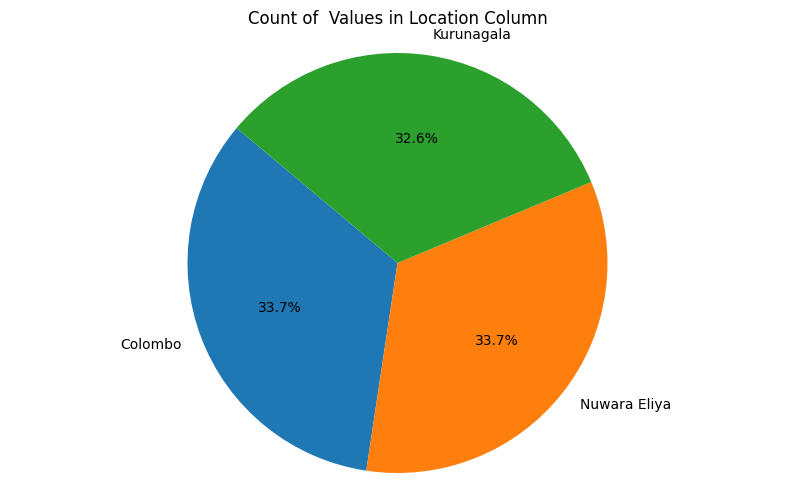

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("Last_Combine_ Data.csv")

# Count the occurrences of each unique value in the "Location" column
location_counts = data['Location'].value_counts()

# Plot the counts in a pie chart
plt.figure(figsize=(10, 6))
plt.pie(location_counts, labels=location_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Count of  Values in Location Column')
plt.show()

   outliers

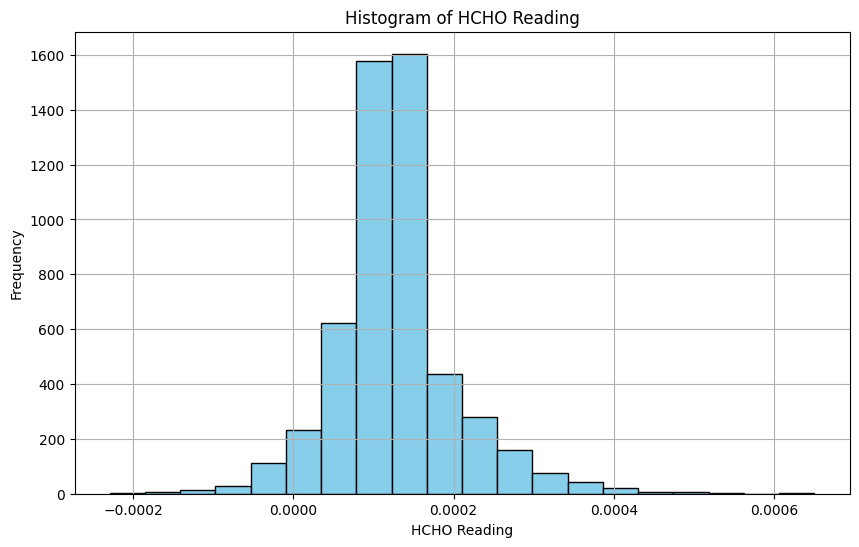

Description of HCHO Reading column:
count    5229.000000
mean        0.000126
std         0.000077
min        -0.000229
25%         0.000083
50%         0.000123
75%         0.000158
max         0.000650
Name: HCHO Reading, dtype: float64


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("Last_Combine_ Data.csv")

# Select the 'HCHO Reading' column
hcho_reading = data['HCHO Reading']



# Draw a histogram with custom x-axis tick positions
plt.figure(figsize=(10, 6))
plt.hist(hcho_reading, bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of HCHO Reading')
plt.xlabel('HCHO Reading')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Describe the 'HCHO Reading' column
hcho_reading_description = hcho_reading.describe()
print("Description of HCHO Reading column:")
print(hcho_reading_description)

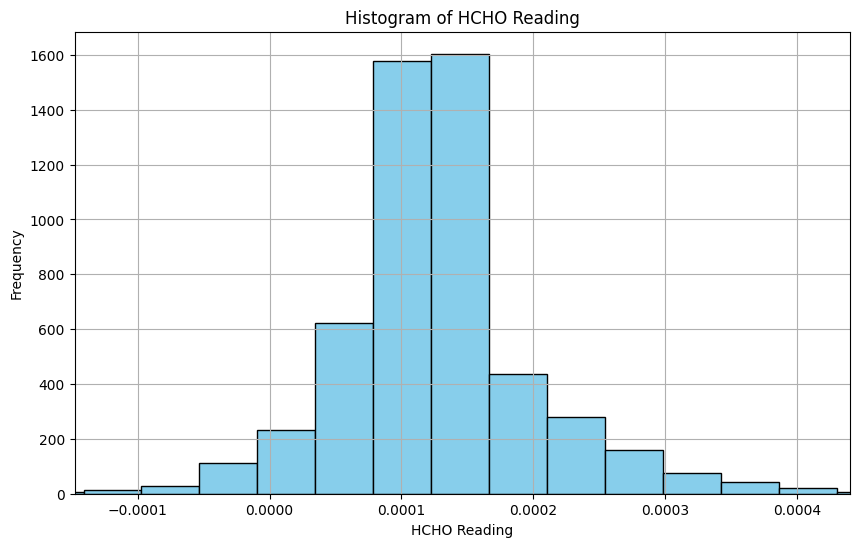

Description of HCHO Reading column:
count    5229.000000
mean        0.000126
std         0.000077
min        -0.000229
25%         0.000083
50%         0.000123
75%         0.000158
max         0.000650
Name: HCHO Reading, dtype: float64


In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("Last_Combine_ Data.csv")

# Select the 'HCHO Reading' column
hcho_reading = data['HCHO Reading']

# Draw a histogram within the specified x-axis range
plt.figure(figsize=(10, 6))
plt.hist(hcho_reading, bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of HCHO Reading')
plt.xlabel('HCHO Reading')
plt.ylabel('Frequency')
plt.xlim(-0.000148, 0.000440)  # Set the x-axis range
plt.grid(True)
plt.show()

# Describe the 'HCHO Reading' column
hcho_reading_description = hcho_reading.describe()
print("Description of HCHO Reading column:")
print(hcho_reading_description)

check value count

In [41]:
import pandas as pd

# Load the dataset
data = pd.read_csv("Last_Combine_ Data.csv")

# Filter the dataset to include only values within the specified range
filtered_data = data[(data['HCHO Reading'] >= -0.000148) & (data['HCHO Reading'] <= 0.000440)]

# Save the filtered dataset as a new CSV file
filtered_data.to_csv("____Filtered_Data.csv", index=False)

# Count occurrences of 'HCHO Reading' in the filtered dataset
hcho_reading_count = filtered_data['HCHO Reading'].count()

# Display the count
print("Count of 'HCHO Reading' in the filtered dataset:", hcho_reading_count)

Count of 'HCHO Reading' in the filtered dataset: 5206


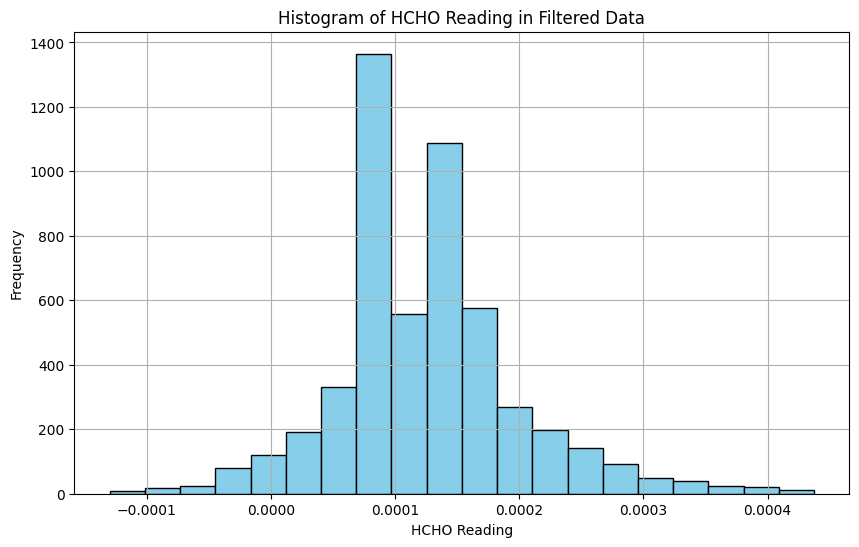

Description of HCHO Reading column in the filtered dataset:
count    5206.000000
mean        0.000125
std         0.000074
min        -0.000130
25%         0.000083
50%         0.000123
75%         0.000158
max         0.000438
Name: HCHO Reading, dtype: float64


In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the filtered dataset
filtered_data = pd.read_csv("____Filtered_Data.csv")

# Select the 'HCHO Reading' column
hcho_reading_filtered = filtered_data['HCHO Reading']

# Draw a histogram
plt.figure(figsize=(10, 6))
plt.hist(hcho_reading_filtered, bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of HCHO Reading in Filtered Data')
plt.xlabel('HCHO Reading')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Describe the 'HCHO Reading' column in the filtered dataset
hcho_reading_description_filtered = hcho_reading_filtered.describe()
print("Description of HCHO Reading column in the filtered dataset:")
print(hcho_reading_description_filtered)

Check Data set

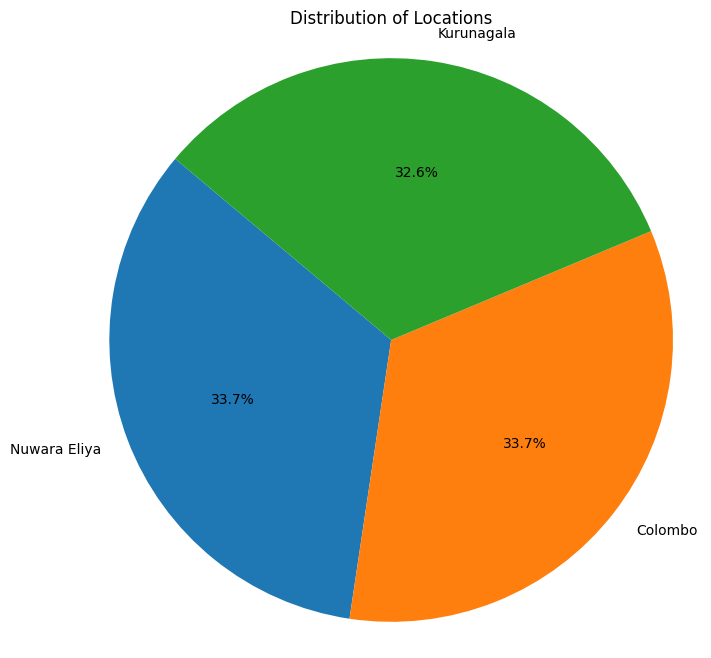

In [54]:
# Load your dataset
df = pd.read_csv("____Filtered_Data.csv")

# Get the count of each unique location
location_counts = df['Location'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(location_counts, labels=location_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Locations')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

HCHO vs Locations

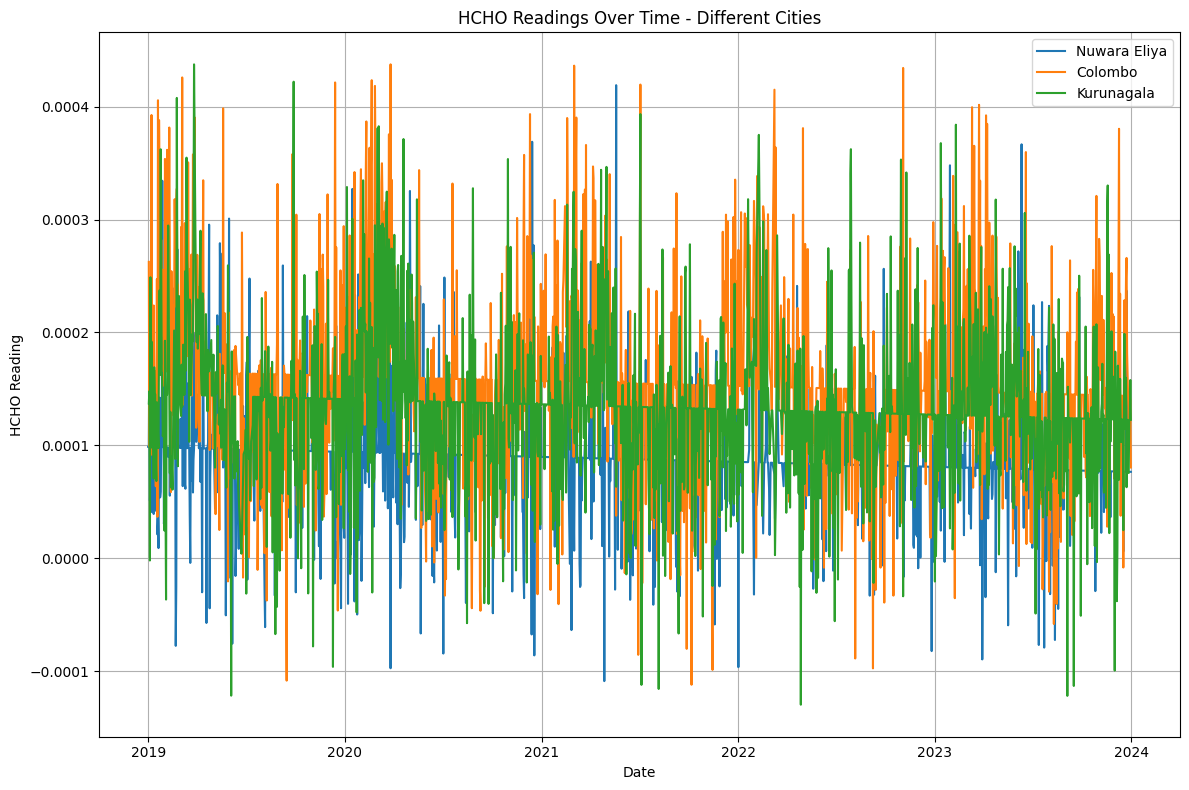

C:\Users\Dee\AppData\Local\Temp\ipykernel_24240\2950013080.py:34: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(len(df['Location'].unique()), 1, i)
C:\Users\Dee\AppData\Local\Temp\ipykernel_24240\2950013080.py:34: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(len(df['Location'].unique()), 1, i)


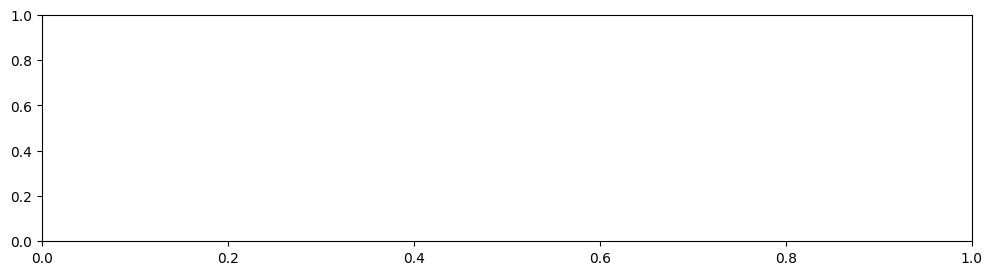

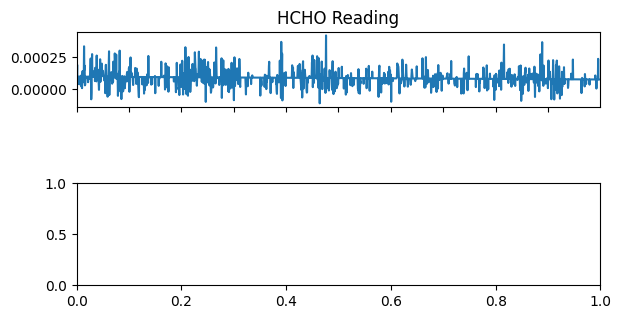

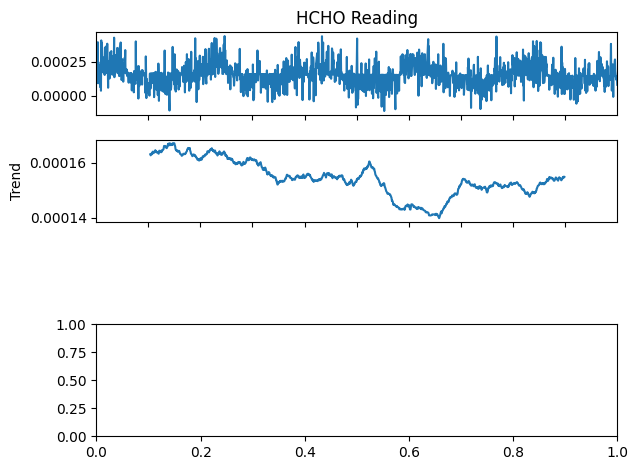

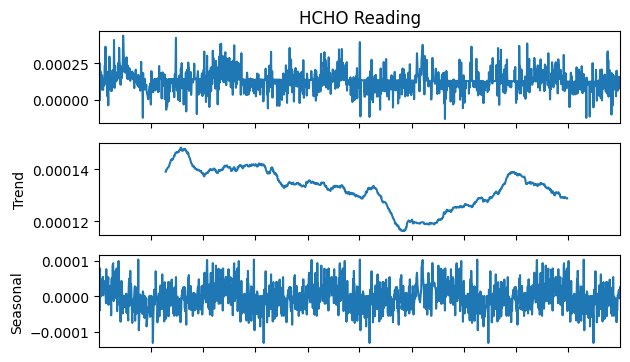

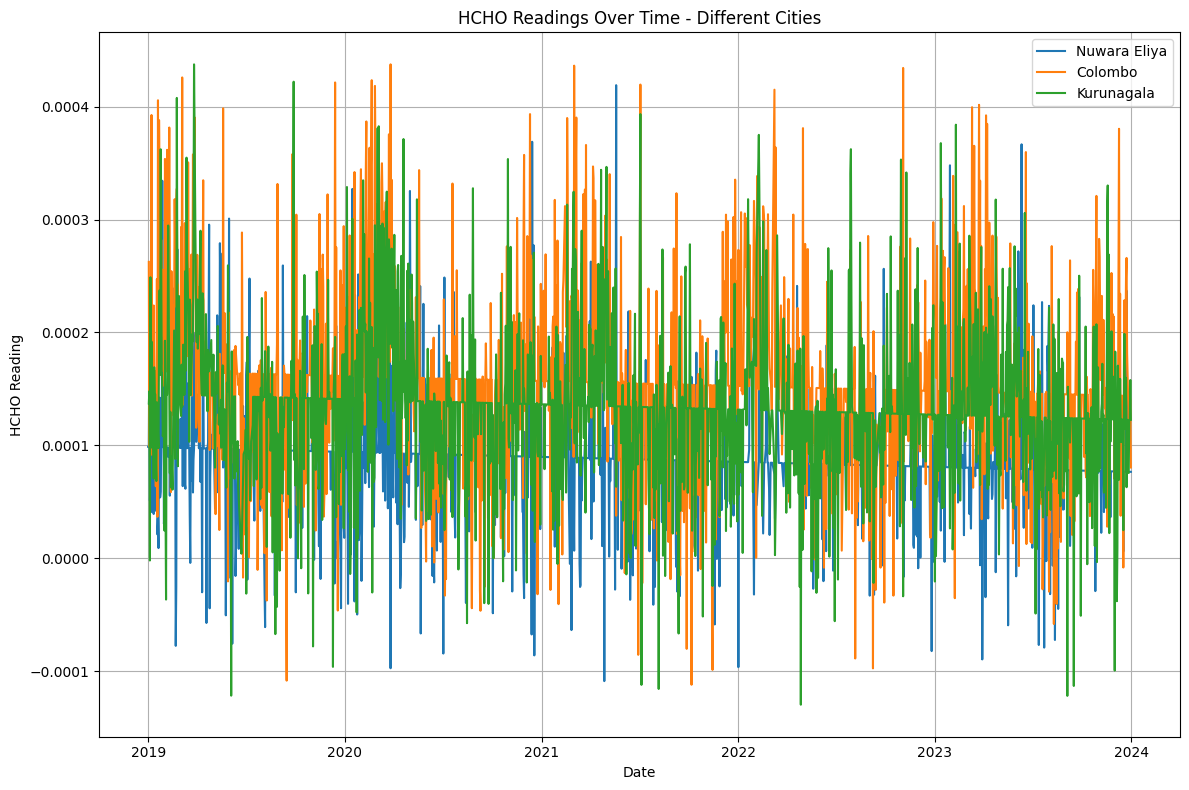

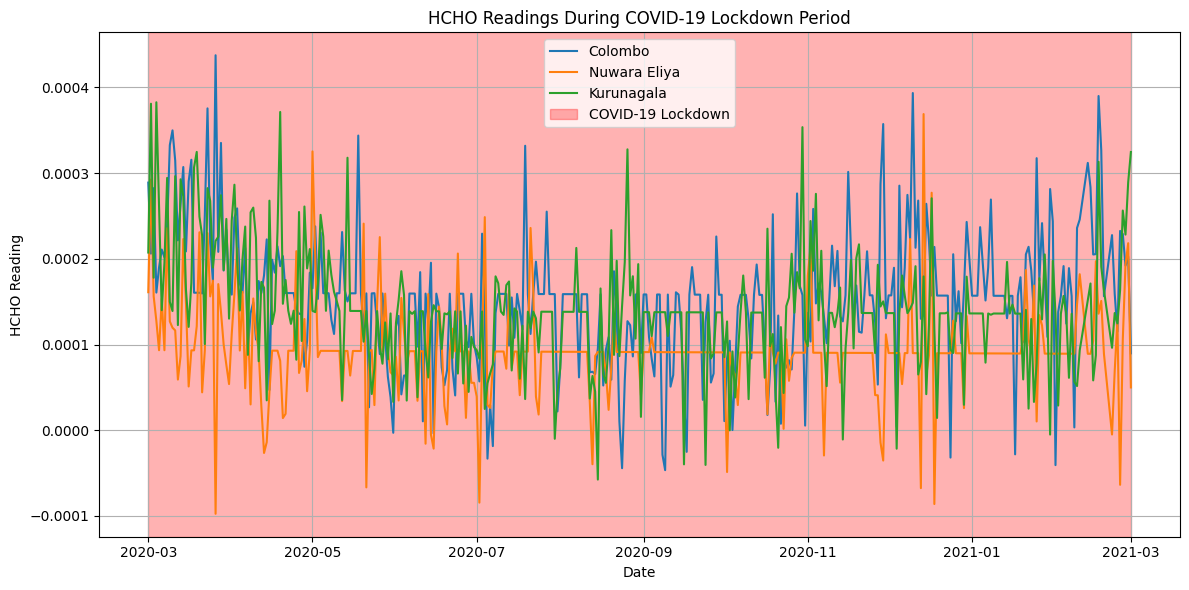

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load your dataset into DataFrame 'df'
df = pd.read_csv("____Filtered_Data.csv")

# Convert 'Current Date' column to datetime format and set as index
df['Current Date'] = pd.to_datetime(df['Current Date'])
df.set_index('Current Date', inplace=True)

# Sort DataFrame by index (date) if not already sorted
df.sort_index(inplace=True)

# Plot time series data for each city
plt.figure(figsize=(12, 8))
for city in df['Location'].unique():
    city_data = df[df['Location'] == city]['HCHO Reading']  # Corrected column name
    plt.plot(city_data.index, city_data, label=city)

plt.title('HCHO Readings Over Time - Different Cities')
plt.xlabel('Date')
plt.ylabel('HCHO Reading')
plt.legend()
plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent warning
plt.show()

# Decompose time series to identify seasonal variations and trends
plt.figure(figsize=(12, 10))
for i, city in enumerate(df['Location'].unique(), start=1):
    city_data = df[df['Location'] == city]['HCHO Reading']
    decomposition = seasonal_decompose(city_data, model='additive', period=365)  # assuming annual seasonality
    plt.subplot(len(df['Location'].unique()), 1, i)
    decomposition.plot()
    plt.title(f'Seasonal Decomposition - {city}')
    plt.xlabel('Date')
    plt.ylabel('HCHO Reading')
    plt.gca().remove()  # Explicitly remove the current subplot axes

plt.tight_layout()  # Adjust layout to prevent warning
plt.show()

# Compare trends across cities
plt.figure(figsize=(12, 8))
for city in df['Location'].unique():
    city_data = df[df['Location'] == city]['HCHO Reading']
    plt.plot(city_data.index, city_data, label=city)

plt.title('HCHO Readings Over Time - Different Cities')
plt.xlabel('Date')
plt.ylabel('HCHO Reading')
plt.legend()
plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent warning
plt.show()

# Analyze changes in gas emissions due to COVID-19 lockdowns
# Define COVID-19 lockdown periods (example)
lockdown_start_date = pd.to_datetime('2020-03-01')
lockdown_end_date = pd.to_datetime('2021-03-01')

# Filter data for the COVID-19 lockdown period
lockdown_data = df[(df.index >= lockdown_start_date) & (df.index <= lockdown_end_date)]

# Plot HCHO readings during the COVID-19 lockdown period
plt.figure(figsize=(12, 6))
for city in lockdown_data['Location'].unique():
    city_data = lockdown_data[lockdown_data['Location'] == city]['HCHO Reading']
    plt.plot(city_data.index, city_data, label=city)

plt.axvspan(lockdown_start_date, lockdown_end_date, color='red', alpha=0.3, label='COVID-19 Lockdown')
plt.title('HCHO Readings During COVID-19 Lockdown Period')
plt.xlabel('Date')
plt.ylabel('HCHO Reading')
plt.legend()
plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent warning
plt.show()


HCHO Vs External Factors

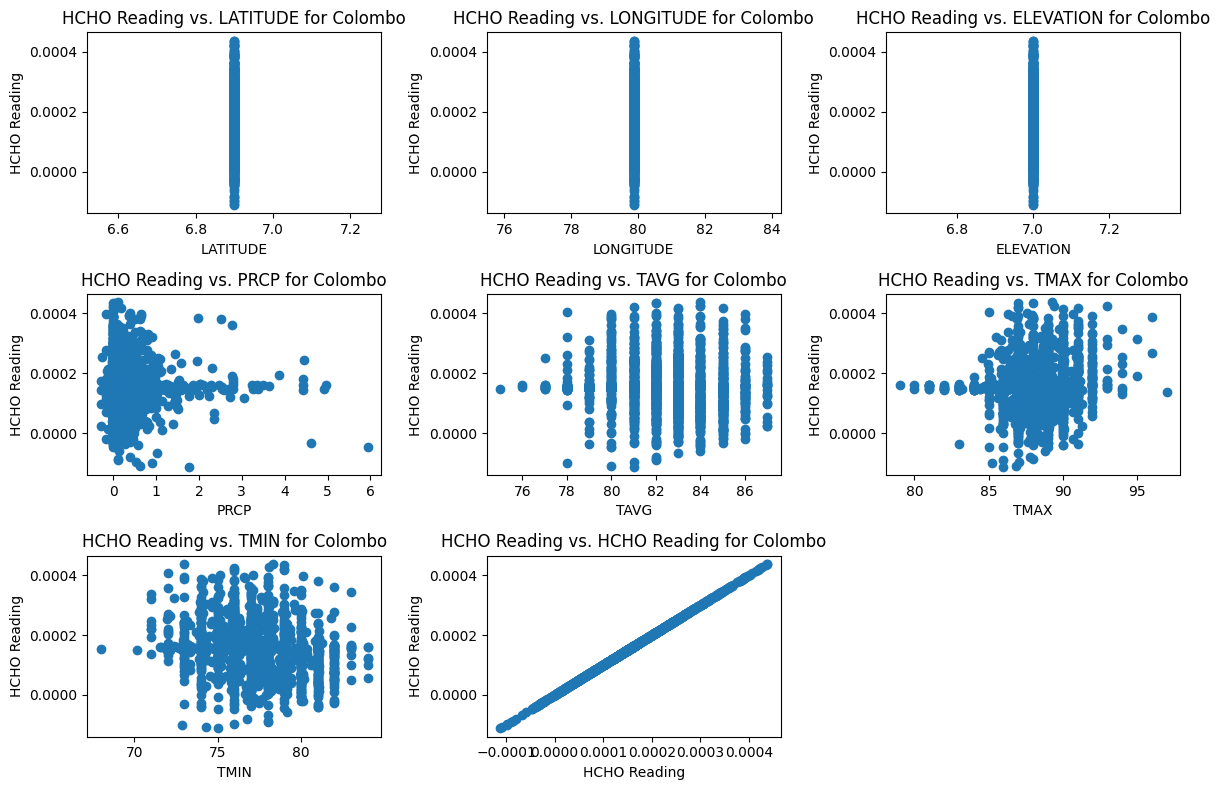

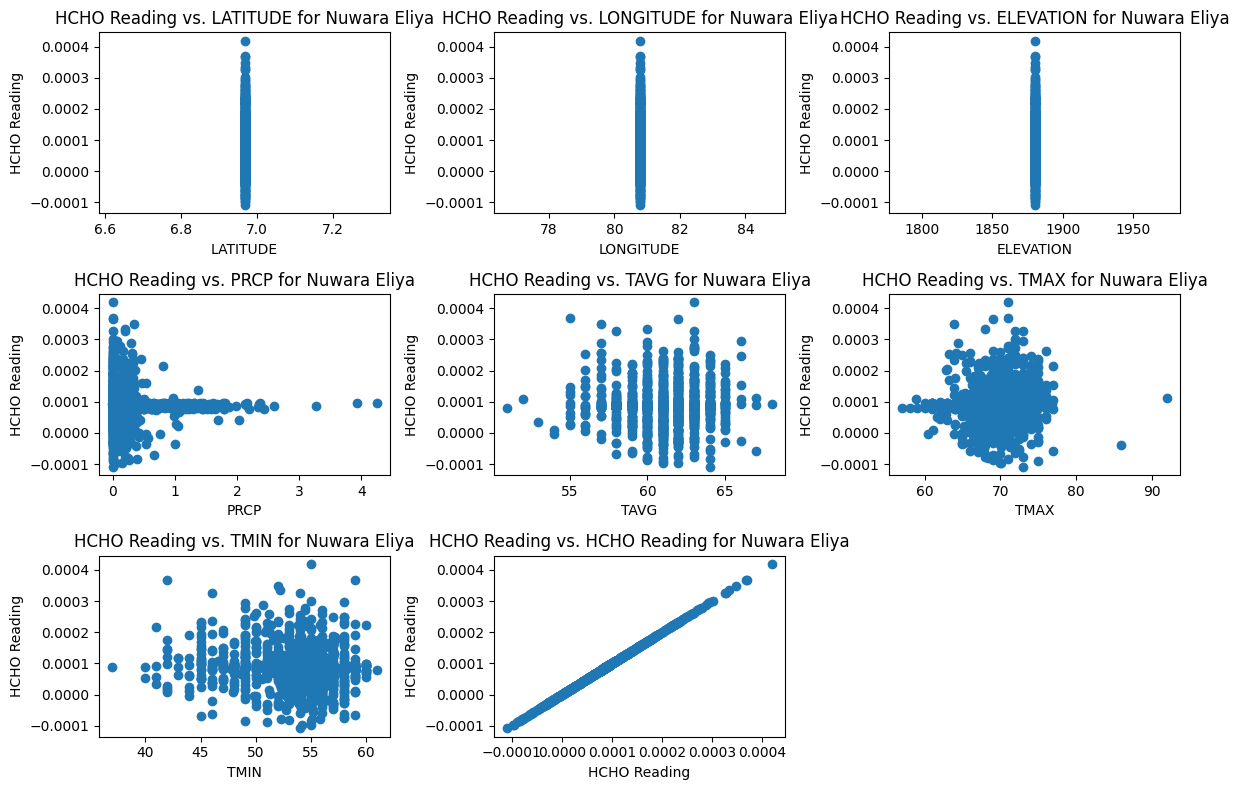

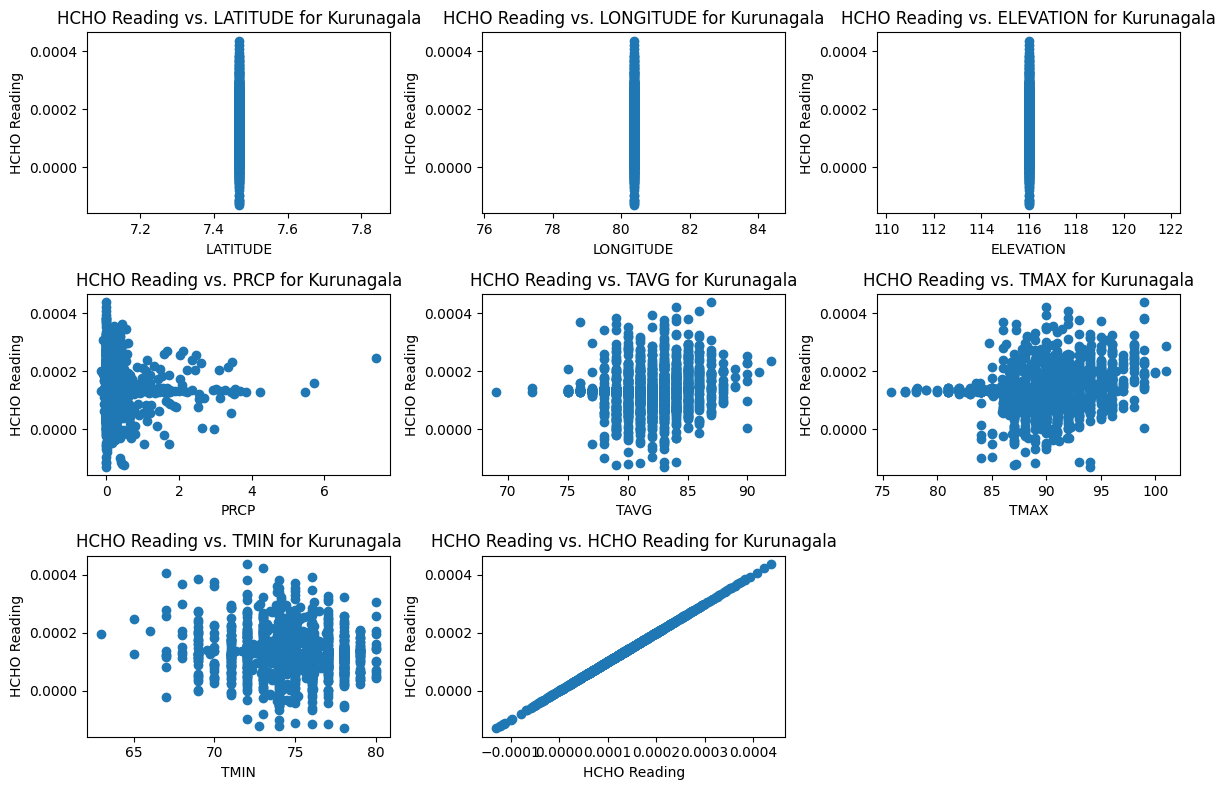

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv("____Filtered_Data.csv")

# Select columns for analysis
columns_to_analyze = ['LATITUDE', 'LONGITUDE', 'ELEVATION', 'PRCP', 'TAVG', 'TMAX', 'TMIN', 'HCHO Reading']

# Iterate over unique values in the "Location" column
unique_locations = df['Location'].unique()

for location in unique_locations:
    # Filter data for the current location
    location_data = df[df['Location'] == location]
    
    # Plotting HCHO Reading against other columns for the current location
    plt.figure(figsize=(12, 8))
    
    for i, column in enumerate(columns_to_analyze, 1):
        plt.subplot(3, 3, i)
        plt.scatter(location_data[column], location_data['HCHO Reading'])
        plt.title(f'HCHO Reading vs. {column} for {location}')
        plt.xlabel(column)
        plt.ylabel('HCHO Reading')

    plt.tight_layout()
    plt.show()
